In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import seaborn as sns
import albumentations as A
from skimage.exposure import rescale_intensity


import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb

In [3]:
def imageProcessing1(df):

        #img = cv2.imread(df)
        # Example IHC image
        ihc_rgb = df#img

        # Separate the stains from the IHC image
        ihc_hed = rgb2hed(ihc_rgb)

        # Create an RGB image for each of the stains
        null = np.zeros_like(ihc_hed[:, :, 0])
        ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))

        ihc_h = ihc_h*255      

   
        image1 = ihc_h.astype('uint8')
   
        # cv2.cvtColor is applied over the
        # image input with applied parameters
        # to convert the image in grayscale 
        image_result = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)


        return image_result

In [4]:
def imageProcessing2(df):

        #img = cv2.imread(df)
        # Example IHC image
        ihc_rgb = df#img

        # Separate the stains from the IHC image
        ihc_hed = rgb2hed(ihc_rgb)

        # Create an RGB image for each of the stains
        null = np.zeros_like(ihc_hed[:, :, 0])
        ihc_d = hed2rgb(np.stack((ihc_hed[:, :, 2], null, null), axis=-1))

        ihc_d = ihc_d*255      

   

        image1 = ihc_d.astype('uint8')
   
        # cv2.cvtColor is applied over the
        # image input with applied parameters
        # to convert the image in grayscale 
        image_result = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)


        return image_result

In [5]:
def imageProcessing3(df):

        #img = cv2.imread(df)
        # Example IHC image
        ihc_rgb = df#img

        # Separate the stains from the IHC image
        ihc_hed = rgb2hed(ihc_rgb)

        # Create an RGB image for each of the stains
        null = np.zeros_like(ihc_hed[:, :, 0])
        # Rescale hematoxylin and DAB channels and give them a fluorescence look
        h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)))
        d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed[:, :, 2], 99)))
        

        # Cast the two channels into an RGB image, as the blue and green channels
        # respectively
        zdh = np.dstack((null, d, h))

        zdh = zdh*255      


        image1 = zdh.astype('uint8')
   
        # cv2.cvtColor is applied over the
        # image input with applied parameters
        # to convert the image in grayscale 
        image_result = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)


        return image_result

In [6]:
def imageProcessing4(df):

        #img = cv2.imread(df)
       
        img = df
        # Split
        red = img[:, :, 0]

        image_result = red*255


        return image_result

In [7]:
def imageProcessing5(df):

        #img = cv2.imread(df)
        img = df

        # Split
        green = img[:, :, 1]

        image_result = green*255


        return image_result

In [8]:
def imageProcessing6(df):

        #img = cv2.imread(df)
        img = df
        

        # Split
        blue = img[:, :, 2]

        image_result = blue*255


        return image_result

Declaration of a simple preprocessor function.  Preprocessor functions are used to preprocess an instance before labeling it. We use @preprocessor(name,resources) decorator to declare a function as preprocessor.

In [9]:
#from spear.labeling import preprocessor

#@preprocessor(name = "noise_removal")
def imagePreProcessing(df):

        img = cv2.imread(df)
        #Noise Removing
        image = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
        #Gaussian Blur
        gaussian_3 = cv2.GaussianBlur(image, (9,9), 10.0) #unblur
        image = cv2.addWeighted(image, 1.5, gaussian_3, -0.5, 0, image)
        #Laplacian Filter
        #kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) #filter
        #image = cv2.filter2D(image, -1, kernel)
        return image

In [10]:
pre_processed = imagePreProcessing("image_20.jpg")

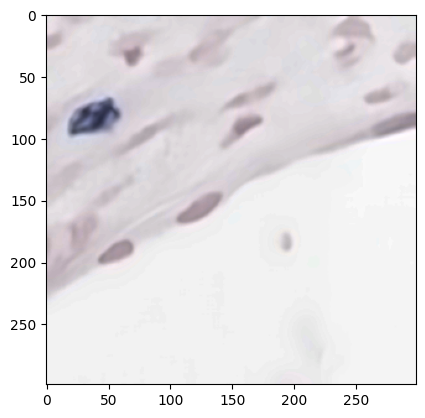

In [11]:
plt.imshow(pre_processed)
plt.show()

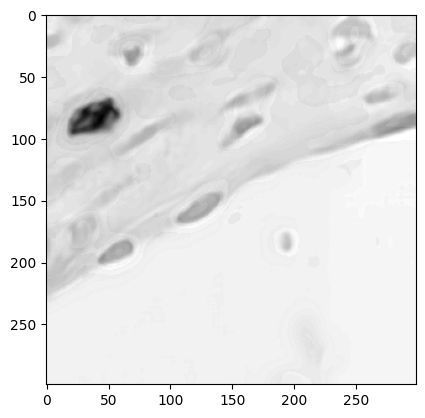

In [12]:
processed1 = imageProcessing1(pre_processed) 
plt.imshow(processed1,cmap='gray')
plt.show()

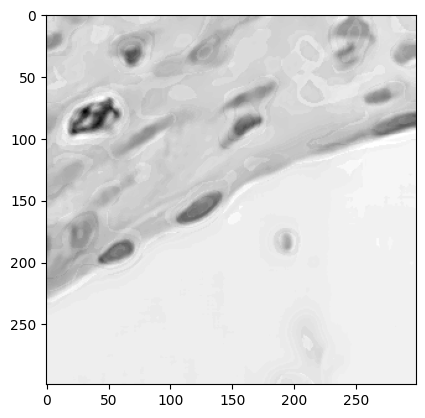

In [13]:
processed2 = imageProcessing2(pre_processed) 
plt.imshow(processed2,cmap='gray')
plt.show()

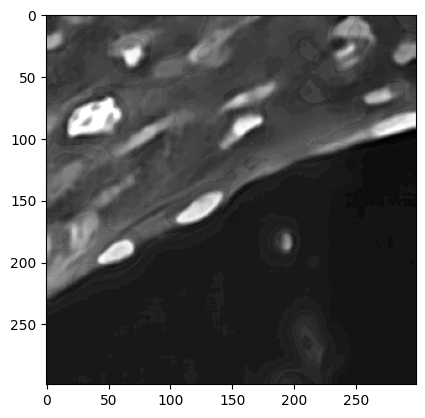

In [14]:
processed3 = imageProcessing3(pre_processed) 
plt.imshow(processed3,cmap='gray')
plt.show()

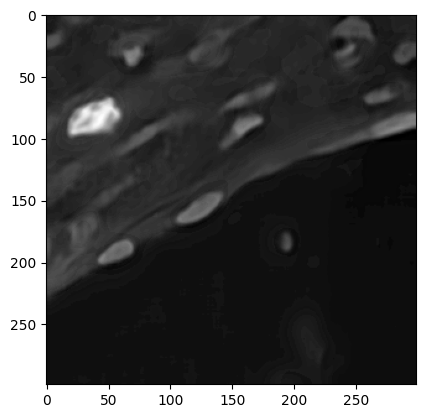

In [15]:
processed4 = imageProcessing4(pre_processed) 
plt.imshow(processed4,cmap='gray')
plt.show()

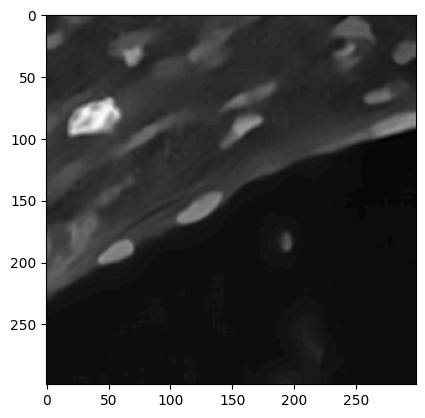

In [16]:
processed5 = imageProcessing5(pre_processed) 
plt.imshow(processed5,cmap='gray')
plt.show()

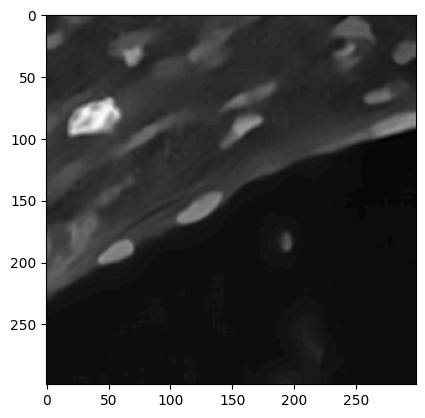

In [17]:
processed5 = imageProcessing5(pre_processed) 
plt.imshow(processed5,cmap='gray')
plt.show()

In [18]:
#@labeling_function(resources=dict(keywords=trigWord1),pre=[convert_to_lower],label=ClassLabels.SPAM)
def LF1(c, d): 
    
    image = d
    img = c
    # applying different thresholding 
    # techniques on the input image
    # Otsu's thresholding after Gaussian filtering
    # Apply GaussianBlur to reduce image noise if it is required

    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(
         blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
    
    thresh2 = 255-image_result

    output = cv2.connectedComponentsWithStats(thresh2)
    (numLabels, labels, stats, centroids) = output
    mask = np.zeros(thresh2.shape, dtype="uint8")

    # loop over the number of unique connected component labels, skipping
    # over the first label (as label zero is the background)
    for i in range(1, numLabels):
        # extract the connected component statistics for the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
    
        # ensure the width, height, and area are all neither too small
        # nor too big
        #keepWidth = w > 5 and w < 30
        #keepHeight = h > 5 and h < 30
        #keepArea = area > 10

        keepWidth = w > 20
        keepHeight = h > 20
        keepArea = 100 < area < 2000
        # ensure the connected component we are examining passes all
        # three tests
        if all((keepWidth, keepHeight, keepArea)):
            # construct a mask for the current connected component and
            # then take the bitwise OR with the mask       
            componentMask = (labels == i).astype("uint8") * 1
            mask = cv2.bitwise_or(mask, componentMask)


        # Multiple objects
        result = image.copy()
        contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        colour = (255, 0, 0)
        thickness = 1
        i = 0
        
        bounding_boxes = []
       # Iterate through the contours and find bounding boxes
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            bounding_boxes.append([x, y, x+w, y+h])
            cv2.rectangle(result, (x, y), (x+w, y+h), colour, thickness)
  

    return result, bounding_boxes


In [19]:
result, bounding_boxes1 = LF1(processed1, pre_processed)

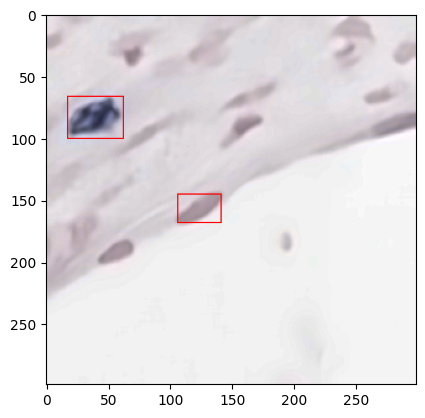

In [20]:




plt.imshow(result)

In [21]:
bounding_boxes1

[[106, 145, 141, 168], [17, 66, 62, 100]]

In [22]:

#@labeling_function(resources=dict(keywords=trigWord1),pre=[convert_to_lower],label=ClassLabels.SPAM)
def LF2(c, d): 
    
    image = d
    img = c
    # applying different thresholding 
    # techniques on the input image
    # Otsu's thresholding after Gaussian filtering
    # Apply GaussianBlur to reduce image noise if it is required

    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(
         blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
    
    thresh2 = 255-image_result

    output = cv2.connectedComponentsWithStats(thresh2)
    (numLabels, labels, stats, centroids) = output
    mask = np.zeros(thresh2.shape, dtype="uint8")

    # loop over the number of unique connected component labels, skipping
    # over the first label (as label zero is the background)
    for i in range(1, numLabels):
        # extract the connected component statistics for the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
    
        # ensure the width, height, and area are all neither too small
        # nor too big
        #keepWidth = w > 5 and w < 30
        #keepHeight = h > 5 and h < 30
        #keepArea = area > 10

        keepWidth = w > 20
        keepHeight = h > 20
        keepArea = 100 < area < 2000
        # ensure the connected component we are examining passes all
        # three tests
        if all((keepWidth, keepHeight, keepArea)):
            # construct a mask for the current connected component and
            # then take the bitwise OR with the mask       
            componentMask = (labels == i).astype("uint8") * 1
            mask = cv2.bitwise_or(mask, componentMask)


        # Multiple objects
        result = image.copy()
        contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        colour = (255, 0, 0)
        thickness = 1
        i = 0
        
        bounding_boxes = []
       # Iterate through the contours and find bounding boxes
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            bounding_boxes.append([x, y, x+w, y+h])
            cv2.rectangle(result, (x, y), (x+w, y+h), colour, thickness)
  

    return result, bounding_boxes


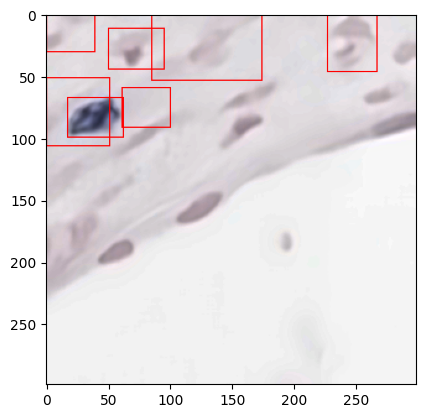

In [23]:
result2, bounding_boxes2 = LF2(processed2, pre_processed)
plt.imshow(result2)

In [24]:
bounding_boxes2

[[17, 67, 62, 99],
 [61, 59, 100, 91],
 [0, 51, 51, 106],
 [50, 11, 95, 44],
 [227, 0, 267, 46],
 [85, 0, 174, 53],
 [0, 0, 39, 30]]

In [25]:
#@labeling_function(resources=dict(keywords=trigWord1),pre=[convert_to_lower],label=ClassLabels.SPAM)
def LF3(c, d): 
    
    image = d
    img = c
    # applying different thresholding 
    # techniques on the input image
    # Otsu's thresholding after Gaussian filtering
    # Apply GaussianBlur to reduce image noise if it is required

    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(
         blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
    
    thresh2 = image_result

    output = cv2.connectedComponentsWithStats(thresh2)
    (numLabels, labels, stats, centroids) = output
    mask = np.zeros(thresh2.shape, dtype="uint8")

    # loop over the number of unique connected component labels, skipping
    # over the first label (as label zero is the background)
    for i in range(1, numLabels):
        # extract the connected component statistics for the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
    
        # ensure the width, height, and area are all neither too small
        # nor too big
        #keepWidth = w > 5 and w < 30
        #keepHeight = h > 5 and h < 30
        #keepArea = area > 10

        keepWidth = w > 20
        keepHeight = h > 20
        keepArea = 100 < area < 2000
        # ensure the connected component we are examining passes all
        # three tests
        if all((keepWidth, keepHeight, keepArea)):
            # construct a mask for the current connected component and
            # then take the bitwise OR with the mask       
            componentMask = (labels == i).astype("uint8") * 1
            mask = cv2.bitwise_or(mask, componentMask)


        # Multiple objects
        result = image.copy()
        contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        colour = (255, 0, 0)
        thickness = 1
        i = 0
        
        bounding_boxes = []
        # Iterate through the contours and find bounding boxes
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            bounding_boxes.append([x, y, x+w, y+h])
            cv2.rectangle(result, (x, y), (x+w, y+h), colour, thickness)
        
            #print("Object:", i+1, "x1:", x1, "x2:", x2, "y1:", y1, "y2:", y2)
            #i += 1    

    return result, bounding_boxes


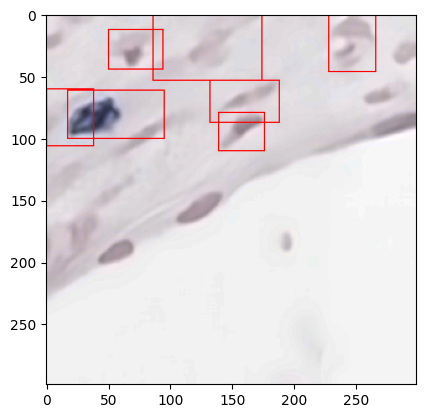

In [26]:
result3 , bounding_boxes3 = LF3(processed3, pre_processed)
plt.imshow(result3)

In [27]:
bounding_boxes3

[[139, 79, 176, 110],
 [17, 61, 95, 100],
 [0, 60, 38, 106],
 [132, 53, 188, 87],
 [50, 12, 94, 44],
 [228, 0, 266, 46],
 [86, 0, 174, 53]]

In [28]:
#@labeling_function(resources=dict(keywords=trigWord1),pre=[convert_to_lower],label=ClassLabels.SPAM)
def LF4(c, d): 
    
    image = d
    img = c
    # applying different thresholding 
    # techniques on the input image
    # Otsu's thresholding after Gaussian filtering
    # Apply GaussianBlur to reduce image noise if it is required

    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(
         blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
    
    thresh2 = image_result

    output = cv2.connectedComponentsWithStats(thresh2)
    (numLabels, labels, stats, centroids) = output
    mask = np.zeros(thresh2.shape, dtype="uint8")

    # loop over the number of unique connected component labels, skipping
    # over the first label (as label zero is the background)
    for i in range(1, numLabels):
        # extract the connected component statistics for the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
    
        # ensure the width, height, and area are all neither too small
        # nor too big
        #keepWidth = w > 5 and w < 30
        #keepHeight = h > 5 and h < 30
        #keepArea = area > 10

        keepWidth = w > 20
        keepHeight = h > 20
        keepArea = 100 < area < 2000
        # ensure the connected component we are examining passes all
        # three tests
        if all((keepWidth, keepHeight, keepArea)):
            # construct a mask for the current connected component and
            # then take the bitwise OR with the mask       
            componentMask = (labels == i).astype("uint8") * 1
            mask = cv2.bitwise_or(mask, componentMask)


        # Multiple objects
        result = image.copy()
        contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        colour = (255, 0, 0)
        thickness = 1
        i = 0
        
        bounding_boxes = []
        # Iterate through the contours and find bounding boxes
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            bounding_boxes.append([x, y, x+w, y+h])
            cv2.rectangle(result, (x, y), (x+w, y+h), colour, thickness)
        
            #print("Object:", i+1, "x1:", x1, "x2:", x2, "y1:", y1, "y2:", y2)
            #i += 1    

    return result, bounding_boxes


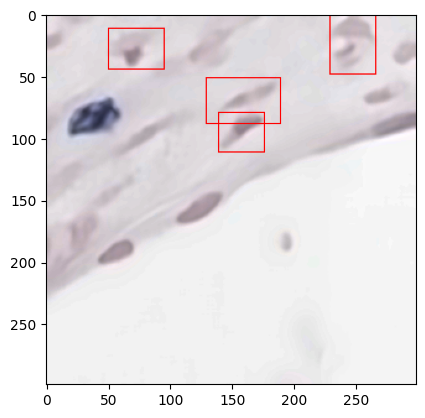

In [29]:
result4 ,bounding_boxes4 = LF4(processed4, pre_processed)
plt.imshow(result4)

In [30]:
bounding_boxes4

[[139, 79, 176, 111], [129, 51, 189, 88], [50, 11, 95, 44], [229, 0, 266, 48]]

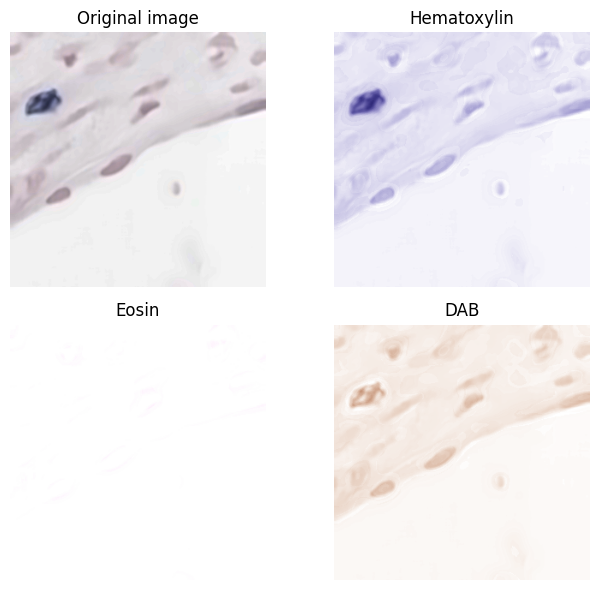

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb

# Example IHC image
ihc_rgb = pre_processed

# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

#Code Written by Sasank for IoU Ranking

In [32]:
#Defining IoU between two Bounding boxes for Ranking
def IoU_2(x1_l,y1_d,x1_r,y1_u,x2_l,y2_d,x2_r,y2_u):

    area1 = (x1_r-x1_l)*(y1_u-y1_d)
    area2 = (x2_r-x2_l)*(y2_u-y2_d)
    cx_l = max(x1_l,x2_l)
    cx_r = min(x1_r,x2_r)
    cy_d = max(y1_d,y2_d)
    cy_u = min(y1_u,y2_u)
    common_area = (cx_r-cx_l)*(cy_u-cy_d)
    if((cx_r-cx_l)<0 or (cy_u-cy_d)<0):
        common_area = 0
    # print(x1_l,y1_d,x1_r,y1_u)
    # print(x2_l,y2_d,x2_r,y2_u)
    # print(cx_l,cy_d,cx_r,cy_u)
    # print(area1,area2,common_area)
    # print("-----------------------------------------------------------")
    iou = common_area/(area1+area2-common_area)
    return iou

In [33]:
#Defining IoU between two Bounding boxes for Ranking
def IoU_count(x1_l,y1_d,x1_r,y1_u,x2_l,y2_d,x2_r,y2_u,threshold):

    area1 = (x1_r-x1_l)*(y1_u-y1_d)
    area2 = (x2_r-x2_l)*(y2_u-y2_d)
    cx_l = max(x1_l,x2_l)
    cx_r = min(x1_r,x2_r)
    cy_d = max(y1_d,y2_d)
    cy_u = min(y1_u,y2_u)
    common_area = (cx_r-cx_l)*(cy_u-cy_d)
    if((cx_r-cx_l)<0 or (cy_u-cy_d)<0):
        common_area = 0
    # print(x1_l,y1_d,x1_r,y1_u)
    # print(x2_l,y2_d,x2_r,y2_u)
    # print(cx_l,cy_d,cx_r,cy_u)
    # print(area1,area2,common_area)
    # print("-----------------------------------------------------------")
    iou = common_area/(area1+area2-common_area)
    if(iou > threshold):
        return 1
    return 0

In [34]:
import pandas as pd

#Stored as 4 files for each LF 
#Each row in file is Image_name BBox(x1,x2,y1,y2) IoU Ranking 

threshold = 0.7

def LF_Labels(): 
    df1 = pd.DataFrame(columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])
    df2 = pd.DataFrame(columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])
    df3 = pd.DataFrame(columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])
    df4 = pd.DataFrame(columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])

    for i in range(500):
        print(i,end=",")
        pre_processed = imagePreProcessing("image_"+str(i)+".jpg")
        
        processed1 = imageProcessing1(pre_processed) 
        processed2 = imageProcessing2(pre_processed) 
        processed3 = imageProcessing3(pre_processed) 
        processed4 = imageProcessing4(pre_processed) 
        # processed5 = imageProcessing5(pre_processed)
        result1 , concat1 = LF1(processed1, pre_processed)
        result2 , concat2 = LF2(processed2, pre_processed)
        result3 , concat3 = LF3(processed3, pre_processed)
        result4 , concat4 = LF4(processed4, pre_processed)
        
        
        concat1 = np.array(concat1)#All bboxes for LF1
        concat2 = np.array(concat2)#All bboxes for LF2
        concat3 = np.array(concat3)#All bboxes for LF3
        concat4 = np.array(concat4)#All bboxes for LF4
        # print(concat1,concat2,concat3,concat4)

        concat_1 = False
        concat_2 = False
        concat_3 = False
        concat_4 = False

        if(concat1.size != 0):
            concat_1 = True
            concat1 = np.concatenate([np.full((concat1.shape[0],1),"image_"+str(i)+".jpg"),    concat1,      np.full((concat1.shape[0],1),0), np.full((concat1.shape[0],1),0)], axis=1)
            concat1 = pd.DataFrame(concat1,columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score","IoU Count"])
        if(concat2.size != 0):
            concat_2 = True
            concat2 = np.concatenate([np.full((concat2.shape[0],1),"image_"+str(i)+".jpg"),    concat2,      np.full((concat2.shape[0],1),0), np.full((concat2.shape[0],1),0)], axis=1)
            concat2 = pd.DataFrame(concat2,columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score","IoU Count"])
        if(concat3.size != 0):
            concat_3 = True
            concat3 = np.concatenate([np.full((concat3.shape[0],1),"image_"+str(i)+".jpg"),    concat3,      np.full((concat3.shape[0],1),0), np.full((concat3.shape[0],1),0)], axis=1)
            concat3 = pd.DataFrame(concat3,columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score","IoU Count"])
        if(concat4.size != 0):
            concat_4 = True
            concat4 = np.concatenate([np.full((concat4.shape[0],1),"image_"+str(i)+".jpg"),    concat4,      np.full((concat4.shape[0],1),0), np.full((concat4.shape[0],1),0)], axis=1)
            concat4 = pd.DataFrame(concat4,columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score","IoU Count"])            

        if(concat_1):
            for ind in concat1.index:
                X_Left,Y_Down,X_Right,Y_Up = int(concat1['X_Left'][ind]), int(concat1['Y_Down'][ind]), int(concat1['X_Right'][ind]), int(concat1['Y_Up'][ind])
                iou = 0
                iou_count = 0
                tot_count = 0
                if(concat_2):
                    tot_count += len(concat2)
                    for ind1 in concat2.index:
                        x_Left,y_Down,x_Right,y_Up = int(concat2['X_Left'][ind1]), int(concat2['Y_Down'][ind1]), int(concat2['X_Right'][ind1]), int(concat2['Y_Up'][ind1])
                        iou_count += IoU_count(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up, threshold)
                        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
                if(concat_3):
                    tot_count += len(concat3)
                    for ind1 in concat3.index:
                        x_Left,y_Down,x_Right,y_Up = int(concat3['X_Left'][ind1]), int(concat3['Y_Down'][ind1]), int(concat3['X_Right'][ind1]), int(concat3['Y_Up'][ind1])
                        iou_count += IoU_count(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up, threshold)
                        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
                if(concat_4):
                    tot_count += len(concat4)
                    for ind1 in concat4.index:
                        x_Left,y_Down,x_Right,y_Up = int(concat4['X_Left'][ind1]), int(concat4['Y_Down'][ind1]), int(concat4['X_Right'][ind1]), int(concat4['Y_Up'][ind1])
                        iou_count += IoU_count(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up, threshold)
                        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
                # if(tot_count!=0):
                concat1['IoU Score'][ind] = iou
                concat1['IoU Count'][ind] = iou_count
            df1 = pd.concat([df1, concat1], axis=0)
        
        if(concat_2):
            for ind in concat2.index:
                X_Left,Y_Down,X_Right,Y_Up = int(concat2['X_Left'][ind]), int(concat2['Y_Down'][ind]), int(concat2['X_Right'][ind]), int(concat2['Y_Up'][ind])
                iou = 0
                iou_count = 0
                tot_count = 0
                if(concat_1):
                    tot_count += len(concat1)
                    for ind1 in concat1.index:
                        x_Left,y_Down,x_Right,y_Up = int(concat1['X_Left'][ind1]), int(concat1['Y_Down'][ind1]), int(concat1['X_Right'][ind1]), int(concat1['Y_Up'][ind1])
                        iou_count += IoU_count(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up, threshold)
                        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
                if(concat_3):
                    tot_count += len(concat3)
                    for ind1 in concat3.index:
                        x_Left,y_Down,x_Right,y_Up = int(concat3['X_Left'][ind1]), int(concat3['Y_Down'][ind1]), int(concat3['X_Right'][ind1]), int(concat3['Y_Up'][ind1])
                        iou_count += IoU_count(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up, threshold)
                        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
                if(concat_4):
                    tot_count += len(concat4)
                    for ind1 in concat4.index:
                        x_Left,y_Down,x_Right,y_Up = int(concat4['X_Left'][ind1]), int(concat4['Y_Down'][ind1]), int(concat4['X_Right'][ind1]), int(concat4['Y_Up'][ind1])
                        iou_count += IoU_count(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up, threshold)
                        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
                
                concat2['IoU Score'][ind] = iou
                concat2['IoU Count'][ind] = iou_count
            df2 = pd.concat([df2, concat2], axis=0)
        
        if(concat_3):
            for ind in concat3.index:
                X_Left,Y_Down,X_Right,Y_Up = int(concat3['X_Left'][ind]), int(concat3['Y_Down'][ind]), int(concat3['X_Right'][ind]), int(concat3['Y_Up'][ind])
                iou = 0
                iou_count = 0
                tot_count = 0
                if(concat_1):
                    tot_count += len(concat1)
                    for ind1 in concat1.index:
                        x_Left,y_Down,x_Right,y_Up = int(concat1['X_Left'][ind1]), int(concat1['Y_Down'][ind1]), int(concat1['X_Right'][ind1]), int(concat1['Y_Up'][ind1])
                        iou_count += IoU_count(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up, threshold)
                        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
                if(concat_2):
                    tot_count += len(concat2)
                    for ind1 in concat2.index:
                        x_Left,y_Down,x_Right,y_Up = int(concat2['X_Left'][ind1]), int(concat2['Y_Down'][ind1]), int(concat2['X_Right'][ind1]), int(concat2['Y_Up'][ind1])
                        iou_count += IoU_count(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up, threshold)
                        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
                if(concat_4):
                    tot_count += len(concat4)
                    for ind1 in concat4.index:
                        x_Left,y_Down,x_Right,y_Up = int(concat4['X_Left'][ind1]), int(concat4['Y_Down'][ind1]), int(concat4['X_Right'][ind1]), int(concat4['Y_Up'][ind1])
                        iou_count += IoU_count(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up, threshold)
                        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
                # if(tot_count!=0):
                concat3['IoU Score'][ind] = iou
                concat3['IoU Count'][ind] = iou_count
            df3 = pd.concat([df3, concat3], axis=0)
        
        if(concat_4):
            for ind in concat4.index:
                X_Left,Y_Down,X_Right,Y_Up = int(concat4['X_Left'][ind]), int(concat4['Y_Down'][ind]), int(concat4['X_Right'][ind]), int(concat4['Y_Up'][ind])
                iou = 0
                iou_count = 0
                tot_count = 0
                if(concat_1):
                    tot_count += len(concat1)
                    for ind1 in concat1.index:
                        x_Left,y_Down,x_Right,y_Up = int(concat1['X_Left'][ind1]), int(concat1['Y_Down'][ind1]), int(concat1['X_Right'][ind1]), int(concat1['Y_Up'][ind1])
                        iou_count += IoU_count(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up, threshold)
                        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
                if(concat_3):
                    tot_count += len(concat3)
                    for ind1 in concat3.index:
                        x_Left,y_Down,x_Right,y_Up = int(concat3['X_Left'][ind1]), int(concat3['Y_Down'][ind1]), int(concat3['X_Right'][ind1]), int(concat3['Y_Up'][ind1])
                        iou_count += IoU_count(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up, threshold)
                        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
                if(concat_4):
                    tot_count += len(concat4)
                    for ind1 in concat4.index:
                        x_Left,y_Down,x_Right,y_Up = int(concat4['X_Left'][ind1]), int(concat4['Y_Down'][ind1]), int(concat4['X_Right'][ind1]), int(concat4['Y_Up'][ind1])
                        iou_count += IoU_count(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up, threshold)
                        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
                # if(tot_count!=0):
                concat4['IoU Score'][ind] = iou
                concat4['IoU Count'][ind] = iou_count
            df4 = pd.concat([df4, concat4], axis=0)
    return df1,df2,df3,df4
        
df1,df2,df3,df4 = LF_Labels()

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [35]:
# saving the dataframes to a CSV format
df1.to_csv('LF1.csv')
df2.to_csv('LF2.csv')
df3.to_csv('LF3.csv')
df4.to_csv('LF4.csv')

#I have got the BBoxes into a CSV file format which has Image,X_Left,Y_Down,X_Right,Y_Up,IoU_Score format.

#Now have to update the IoU_Score for each patch with other patches.

In [36]:
df1 = pd.read_csv('LF1.csv')
df2 = pd.read_csv('LF2.csv')
df3 = pd.read_csv('LF3.csv')
df4 = pd.read_csv('LF4.csv')

In [109]:
# print(df1["Image"])

df1_sorted = df1.sort_values("IoU Count",ascending=False)
df2_sorted = df2.sort_values("IoU Count",ascending=False)
df3_sorted = df3.sort_values("IoU Count",ascending=False)
df4_sorted = df4.sort_values("IoU Count",ascending=False)

# saving the dataframes to a CSV format
df1_sorted.to_csv('LF1_Sorted.csv')
df2_sorted.to_csv('LF2_Sorted.csv')
df3_sorted.to_csv('LF3_Sorted.csv')
df4_sorted.to_csv('LF4_Sorted.csv')

# print(df1_sorted["Image"])

df1_sorted = df1_sorted[df1_sorted["IoU Count"] > 0] 
df2_sorted = df2_sorted[df2_sorted["IoU Count"] > 0]
df3_sorted = df3_sorted[df3_sorted["IoU Count"] > 0]
df4_sorted = df4_sorted[df4_sorted["IoU Count"] > 0]

df1_sorted = df1_sorted[["Image","IoU Count"]]
df2_sorted = df2_sorted[["Image","IoU Count"]]
df3_sorted = df3_sorted[["Image","IoU Count"]]
df4_sorted = df4_sorted[["Image","IoU Count"]]

df1_count = df1_sorted.groupby(['Image']).count()
df2_count = df2_sorted.groupby(['Image']).count()
df3_count = df3_sorted.groupby(['Image']).count()
df4_count = df4_sorted.groupby(['Image']).count()

df1_count["Images"] = df1_count.index
df2_count["Images"] = df2_count.index
df3_count["Images"] = df3_count.index
df4_count["Images"] = df4_count.index
# print(df1_count)

df1_count = df1_count[["Images","IoU Count"]]
df2_count = df2_count[["Images","IoU Count"]]
df3_count = df3_count[["Images","IoU Count"]]
df4_count = df4_count[["Images","IoU Count"]]


def fun(x):
    l = x.split("_")
    l = l[1].split(".")
    return int(l[0])

df1_count["Images"]= df1_count["Images"].apply(fun)
df2_count["Images"]= df2_count["Images"].apply(fun)
df3_count["Images"]= df3_count["Images"].apply(fun)
df4_count["Images"]= df4_count["Images"].apply(fun)

df1_count = df1_count.sort_values("Images")
df2_count = df2_count.sort_values("Images")
df3_count = df3_count.sort_values("Images")
df4_count = df4_count.sort_values("Images")

df1_count.reset_index(inplace=True,drop=True)
df_gold_label = pd.read_csv("labels.csv")
df_gold_label["Images"] = df_gold_label.index
# print(df_gold_label)
# print(df1_count)

df1_count = df_gold_label.merge(df1_count, on ='Images',how='left')
df2_count = df_gold_label.merge(df2_count, on ='Images',how='left')
df3_count = df_gold_label.merge(df3_count, on ='Images',how='left')
df4_count = df_gold_label.merge(df4_count, on ='Images',how='left')

df1_count = df1_count.fillna(0)
df2_count = df2_count.fillna(0)
df3_count = df3_count.fillna(0)
df4_count = df4_count.fillna(0)

df1_count = df1_count[["Images","IoU Count","Label"]]
df2_count = df2_count[["Images","IoU Count","Label"]]
df3_count = df3_count[["Images","IoU Count","Label"]]
df4_count = df4_count[["Images","IoU Count","Label"]]

In [110]:
# saving the dataframes to a CSV format
df1_count.to_csv('LF1_Counted.csv')
df2_count.to_csv('LF2_Counted.csv')
df3_count.to_csv('LF3_Counted.csv')
df4_count.to_csv('LF4_Counted.csv')

In [39]:
# df1 = pd.read_csv('LF1.csv')
# df2 = pd.read_csv('LF2.csv')
# df3 = pd.read_csv('LF3.csv')
# df4 = pd.read_csv('LF4.csv')

# Df1 = df1.sort_values("Image")
# Df2 = df2.sort_values("Image")
# Df3 = df3.sort_values("Image")
# Df4 = df4.sort_values("Image")

# Df1 = Df1.reset_index()
# Df1 = Df1.loc[:, ~Df1.columns.str.contains('^Unnamed')]
# Df1 = Df1.drop(columns=['index'])
# Df2 = Df2.reset_index()
# Df2 = Df2.loc[:, ~Df2.columns.str.contains('^Unnamed')]
# Df2 = Df2.drop(columns=['index'])
# Df3 = Df3.reset_index()
# Df3 = Df3.loc[:, ~Df3.columns.str.contains('^Unnamed')]
# Df3 = Df3.drop(columns=['index'])
# Df4 = Df4.reset_index()
# Df4 = Df4.loc[:, ~Df4.columns.str.contains('^Unnamed')]
# Df4 = Df4.drop(columns=['index'])

# # saving the dataframes to a CSV format
# Df1.to_csv('LF1_Sorted_Imagewise.csv')
# Df2.to_csv('LF2_Sorted_Imagewise.csv')
# Df3.to_csv('LF3_Sorted_Imagewise.csv')
# Df4.to_csv('LF4_Sorted_Imagewise.csv')